### **📝 Instructions**
Sales forecasting system
We want to set up our company's warehouse in another location and we need to estimate the rate of sales, which has been increasing since the company's creation, for the next few months in order to provide the space we will need.

In [9]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

#### **Step 1: Loading the dataset**
The dataset can be found in this project folder under the name sales.csv. You can load it into the code directly from the link:

https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv
Or download it and add it by hand in your repository.

In [10]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
df_raw.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [14]:
df_raw.to_csv("../data/raw/df_raw.csv", index=False)

In [11]:
df_interim = df_raw.copy()

df_interim['date'] = pd.to_datetime(df_interim.date)
df_interim = df_interim.set_index('date')
ts = df_interim['sales']
ts.head()

date
2022-09-03 17:10:08.079328    55.292157
2022-09-04 17:10:08.079328    53.803211
2022-09-05 17:10:08.079328    58.141693
2022-09-06 17:10:08.079328    64.530899
2022-09-07 17:10:08.079328    66.013633
Name: sales, dtype: float64

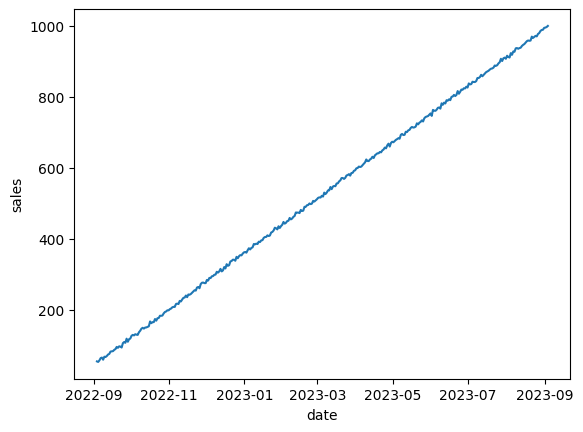

In [12]:
sns.lineplot(data=ts)
plt.show()

In [15]:
ts.to_csv("../data/interim/df_interim.csv", index=True)

#### **Step 2: Construct and analyze the time serie**
Construct the valid data structure for the time serie, graph it, and then analyze it and answer the following questions:

Which is the tensor of the time serie?
Which is the trend?
Is it stationary?
Is there variability or noise?
`Note: A tensor in a time serie is the minimum unit of time for which there is data. It can be every second, minute, hour, day, week, month...`

In [ ]:
def test_stacionary(time_series):
    print("Results")
    df_test = adfuller(time_series, autolag="AIC")
    df_out = pd.Series(df_test[0:4], index=['test statistic', 'pvalue', 'lags', 'no observations'])
    for key, value in df_test[4].items():
        df_out['critical values (%s)'%key] = value
    
    return df_out

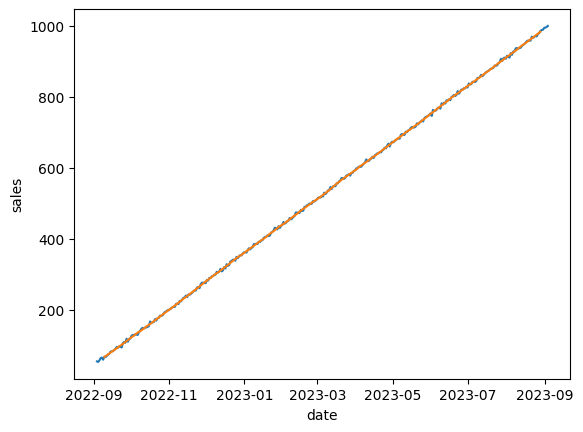

In [16]:
decomposition = seasonal_decompose(ts, period=12)
trend = decomposition.trend
sns.lineplot(ts)
sns.lineplot(trend)
plt.show()

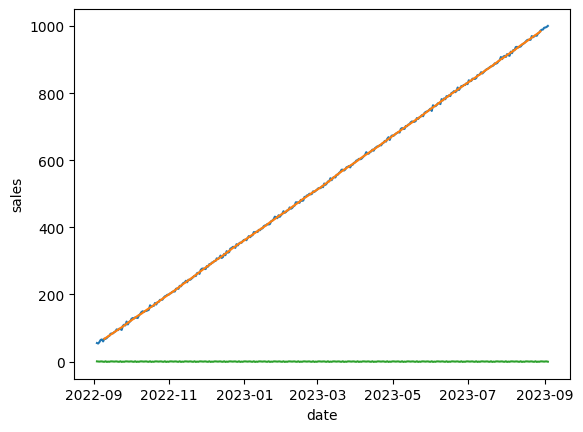

In [17]:
seasonal = decomposition.seasonal
sns.lineplot(ts)
sns.lineplot(trend)
sns.lineplot(seasonal)
plt.show()

#### **Step 3: Train an ARIMA**
Use the training data to find the best parameterization of your ARIMA model.

#### **Step 4: Predict with the test set**
Now use the trained model with the test set and compare the points with the real ones. Measure the performance of the time serie.

#### **Step 5: Save the model**
Store the model in the corresponding folder.